# Linear Regression

## The normal equation

\begin{gather*}
\hat{\theta}=(X^TX)^{-1} X^T y
\end{gather*}

In Introduction to Linear Algebra by Strang, the formula is:
\begin{gather*}
\hat{x}=(A^TA)^{-1} A^T b
\end{gather*}

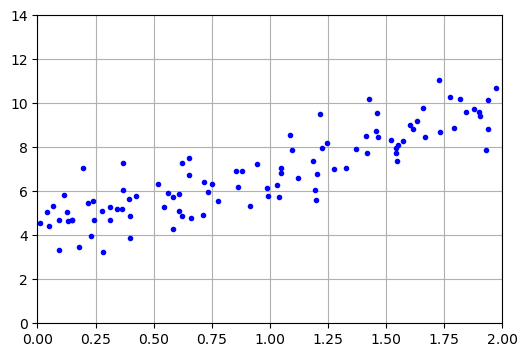

In [1]:
# Generate some linear-looking data for testing
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 14]) # Range of the axis' values
plt.grid()
plt.show()

In [2]:
# Compute the normal equation
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

Function used to compute y:
\begin{gather*}
y = 4 + 3x_1 + noise
\end{gather*}
where noise is the np.random.randn(m, 1).
So, the expected parameters would be 4 and 3, but as we added a noise value, the computed parameters are no quite these values, but close enough.
The predicted equation would be:

\begin{gather*}
\hat{y} = 4.21509616x_0 + 2.77011339x_1
\end{gather*}

In [3]:
# Predict values
X_new = np.array([[0], [2]]) # The min and max values of the plot, so we can get a straight line
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best # Dot product = plug the values of X_new_b into the 'y' function with the theta_best parameters (see previous equation)
y_predict

array([[4.21509616],
       [9.75532293]])

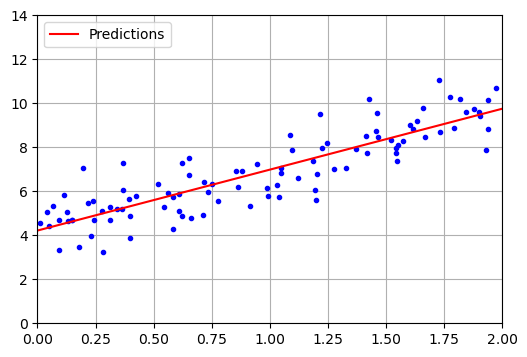

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.axis([0, 2, 0, 14]) # Range of the axis' values
plt.grid()
plt.legend(loc="upper left")
plt.show()

### The same projection but using LinearRegression class from sklearn

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [6]:
lin_reg.predict(X_new)
# The same values, and it's not required to append the dummy "1" column.

array([[4.21509616],
       [9.75532293]])

# Batch gradient descent

In [7]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # Randomly initialized model parameters (the starting point from which the algorithm would iterate)

for epoch in range(n_epochs):
    gradients = (2 / m) * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

# Stochastic gradient descent

In [8]:
n_epochs = 50
t0, t1 = 5, 50 # Learning schedule hyperparameters

# Determines the learning rate (eta) at each iteration
def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # Random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi =   y[random_index : random_index + 1]
        gradients = 2 * (xi.T @ (xi @ theta - yi)) # Same as batch, but instead of using the entire sets (X, y), just use 
                                                   # the values picked randomly (xi, yi). As for this, the divide by 2 is not required.
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [9]:
# Perform linear regression using SGD with sklearn
from sklearn.linear_model import SGDRegressor

# max_iter = n_epochs
# if it runs n_iter_no_change times, and the score loss drops by less than "tol", it stops (even before max_iter).
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # ravel() makes the 2D array into 1D array (which fit() expected)

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [10]:
sgd_reg.predict(X_new)

array([4.21278812, 9.75819346])

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# Polynomial Regression

In [12]:
# Generate random data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = (0.5 * (X ** 2)) + X + 2 + np.random.randn(m, 1)

Equation used for y:
\begin{gather*}
y = 0.5x^2 + x + 2 + noise
\end{gather*}

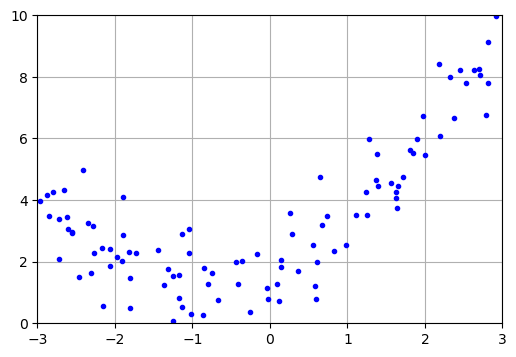

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10]) # Range of the axis' values
plt.grid()
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures

# With degree=2, the new dataset will have 2 columns -> [0] = the original value; [1] = the original value squared.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [15]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# Here:
#   intercept: the "c" term
#   coef: X and X^2 (in that order, reversed)

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

The predicted equation would be:
\begin{gather*}
\hat{y} = 0.56x^2 + 0.93x + 1.78
\end{gather*}

In [17]:
# Predict values
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # Generate 100 values between -3 and 3, continuosly
X_new_poly = poly_features.transform(X_new)
y_predict_poly = lin_reg.predict(X_new_poly)

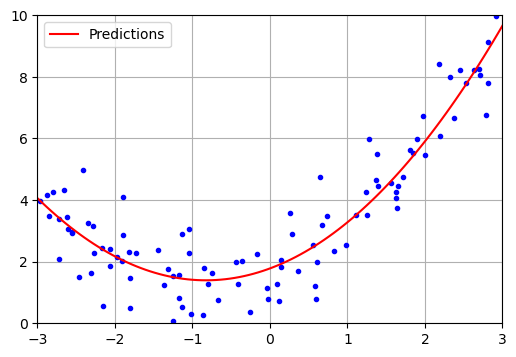

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict_poly, "r-", label="Predictions")
plt.axis([-3, 3, 0, 10]) # Range of the axis' values
plt.grid()
plt.legend(loc="upper left")
plt.show()

# Learning curves

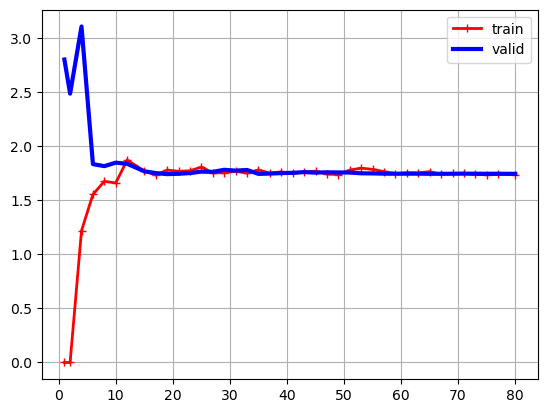

In [19]:
# Learning curve of LinearRegression (straight line)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), 
                                                         cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
# plt.axis([0, 80, 0, 3.5]) # Range of the axis' values
plt.grid()
plt.legend(loc="upper right")
plt.show()

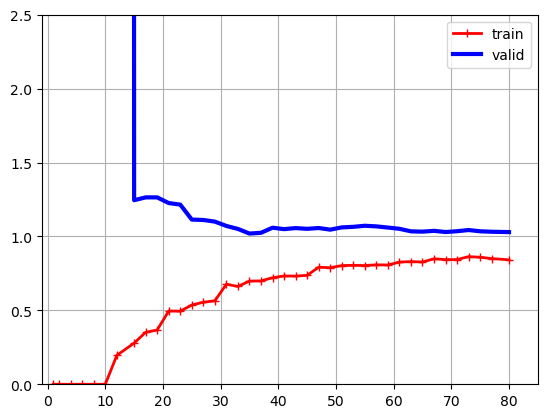

In [20]:
# Learning curve of 10th-degree polynomial
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression(),
)

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40),
                                                        cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.axis([-1, 85, 0, 2.5]) # Range of the axis' values
plt.grid()
plt.legend(loc="upper right")
plt.show()

# Regularized learning models

## Ridge regression

In [21]:
# Close-form
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [22]:
# Using stochastic gradient descent
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([4.82830117])

## Lasso regression

In [23]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

## Elastic net regression

In [24]:
from sklearn.linear_model import ElasticNet

# l1_ratio is the mix ratio r
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

# Early stopping

In [25]:
# On regularization of iterative learning algorithms (such as GD) 
# it's a good idea to stop training when the validation error reaches a minimum.
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Re-generate quadratic random data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = (0.5 * (X ** 2)) + X + 2 + np.random.randn(m, 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False), 
    StandardScaler(),
)
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float("inf")

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)

    # This implementation does not stop training (as the title "Early stopping" suggest), but save the best model allowing
    # to revert back to the best model found in the incremental training sessions.
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

best_valid_rmse

0.7774374754877698

# Logistic Regression

In [26]:
# Used more as a binary classifier

## Decision Boundaries

In [27]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
# Train the model to detect only Iris virginica based only on the petal width.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


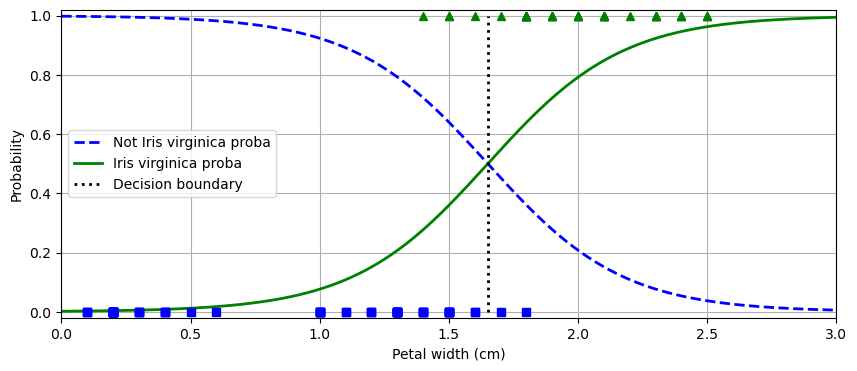

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # reshape to get a column vector (-1 means automatic)
y_proba = log_reg.predict_proba(X_new) # return the probability instead of the actual prediction
# y_proba is an array of 2 elements: the former is the probability of being False and the latter to be True
# So here just filter the True column, and with [0, 0] just select the first element
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0] # When probability is 50%

plt.figure(figsize=(10, 4))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")

plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
# plt.plot(X_train[y_train == 1], [1]*len(X_train[y_train == 1]), "g^") # This is the same as previous line, but y_train just contains 0 and 1, so it's shorter

plt.axis([0, 3, -0.02, 1.02])
plt.legend(loc="center left")
plt.grid()
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.show()

In [33]:
decision_boundary

1.6516516516516517

In [34]:
log_reg.predict([[1.5], [1.65], [1.652], [1.7]])

array([False, False,  True,  True])

## Softmax Regression (multinomial logistic regression)

In [35]:
# To classify in more than 2 classes
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,30
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
softmax_reg.predict([[5, 2]])

array([2])

In [37]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

# Exercises

1. Which linear regression training algorithm can you use if you have a training set with millions of features?<br>
R. Using the normal equation (closed form) inccur into a lot of matrices multiplication, and maybe do not fit in memory. It's better to use gradient descent, specifically SGD.
2. Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?<br>
R. Gradient descent algorithm because it will take more time to find the minimum. The solution is to standardize the values, e.g. by using StandardScaler().
3. Can gradient descent get stuck in a local minimum when training a logistic regression model?<br>
R. For log loss and cross entropy cost functions no, because they are convex.
4. Do all gradient descent algorithms lead to the same model, provided you let them run long enough?<br>
R. If using a very small eta, yes.
5. Suppose you use batch gradient descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?<br>
R. It means the eta is not small enough and just pass through the global minimum. The solution could be save the best model at each iteration or use a smaller eta.
6. Is it a good idea to stop mini-batch gradient descent immediately when the validation error goes up?<br>
R. No, because it may be escaping from a local minimum and later on may reach the global minimum.
7. Which gradient descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?<br>
R. Batch gradient descent because it works on the entire training set, but it depends on the number of features (it may not fit in memory). The convergence depends on the cost function.
8. Suppose you are using polynomial regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?<br>
R. It means that the model is overfitting the training data. It could be solved by:
    1. Using a more simple model (with fewer degrees of freedom).
    2. Supply more training data until the validation error reaches the training error.
    3. Regularized the model.
9. Suppose you are using ridge regression and you notice that the training error and the validation error are almost equal and faily high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter "alpha" or reduce it?<br>
R. Large training and validation error, and almost equal, mean the model is underfitting the training data and suffers for high bias. To minimized it, the "alpha" hyperparameter should be reduce it.
10. Why would you want to use:
    1. Ridge regression instead of plain linear regression (i.e., without any regularization)?<br>
       R. To reduce the degrees of freedom, hence reduce overfitting.
    2. Lasso instead of ridge regression?<br>
       R. When you suspect there are few features useful, because it tends to reduce useless features down to zero.
    3. Elastic net instead of lasso regression?<br>
       R. When the number of features is greater than the number of training data.
11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two logistic regression classifiers or one softmax regression classifier?<br>
R. Since these are not mutually exclusive, should use two logistic regression classifiers.

# Exercise 12

Implement batch gradient descent with early stopping for softmax regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset.

In [97]:
# Get the data
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Add the dummy column with 1's
X_b = np.c_[np.ones(len(X_train)), X_train]
X_b_class_0 = X_b[y_train == 0]
X_b_class_1 = X_b[y_train == 1]
X_b_class_2 = X_b[y_train == 2]

In [83]:
type(y)

pandas.core.series.Series

score function for class k:
\begin{equation}
s_k(x) = (\theta^{(k)})^T x
\end{equation}

softmax function (probability):
\begin{equation}
\hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum^{K}_{j=1}exp(s_j(x))}
\end{equation}

In [87]:
# Batch gradient descent
# TODO: adapt this with the previous equations
eta = 0.1 # learning rate
n_epochs = 1 #1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(len(X_b[0]), 1) # Randomly initialized model parameters (the starting point from which the algorithm would iterate)

for epoch in range(n_epochs):
    # Compute score function for class 0:
    for x in X_b:
        s_k = theta.T @ x
        print(s_k)
    
    # gradients = (2 / m) * (X_b.T @ (X_b @ theta - y))
    
    # This should not change
    # theta = theta - eta * gradients

# theta

[0.43268184]
[0.43268184]
[0.44650827]
[0.41885541]
[0.43268184]
[0.52074026]
[0.49745069]
[0.41885541]
[0.43268184]
[0.35408656]
[0.41885541]
[0.40502898]
[0.36791299]
[0.40939228]
[0.4603347]
[0.54839312]
[0.57604598]
[0.49745069]
[0.4559714]
[0.48362426]
[0.39120255]
[0.54839312]
[0.48798756]
[0.58550911]
[0.36354969]
[0.40502898]
[0.53456669]
[0.41885541]
[0.43268184]
[0.40502898]
[0.40502898]
[0.54839312]
[0.35408656]
[0.43268184]
[0.41885541]
[0.4603347]
[0.44650827]
[0.36791299]
[0.44650827]
[0.41885541]
[0.51127712]
[0.51127712]
[0.44650827]
[0.66410439]
[0.4930874]
[0.49745069]
[0.40502898]
[0.43268184]
[0.41885541]
[0.43268184]
[0.75363589]
[0.8460576]
[0.79075188]
[0.78565205]
[0.83223117]
[0.7165199]
[0.8831736]
[0.6881305]
[0.70269347]
[0.86424733]
[0.66047764]
[0.8875369]
[0.59134549]
[0.75363589]
[0.84095777]
[0.79511518]
[0.8460576]
[0.57751906]
[0.8460576]
[0.66994077]
[0.99888488]
[0.78565205]
[0.79075188]
[0.62409818]
[0.74417276]
[0.79511518]
[0.73980946]
[0.9064631